In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from IPython.display import display

print('TensorFlow version: ' + tf.__version__)

TensorFlow version: 2.4.0


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
bc = data.data

target = 'class'

bc[target] = data.target

di = {0: 'WDBC-Malignant',
    1: 'WDBC-Benign'}

bc['class'].replace(di, inplace=True)
display(bc)

agg = bc.groupby([target]).size().reset_index(name='counts')
display(agg)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,WDBC-Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,WDBC-Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,WDBC-Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,WDBC-Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,WDBC-Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,WDBC-Malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,WDBC-Malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,WDBC-Malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,WDBC-Malignant


,class,counts
0,WDBC-Benign,357
1,WDBC-Malignant,212


In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
bc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
sns.set()

In [7]:
run = False

if run:
    total_rows = bc.shape[0]
    print('Number of rows:', total_rows)
    sample_rows = int(total_rows/10)
    print('Sample of rows:', sample_rows)
    bc_sample = bc.sample(sample_rows)
    sns.pairplot(bc, hue=target)

In [8]:
# Convert labels to categorical one-hot encoding
bc_dum = pd.get_dummies(bc, columns=[target], prefix=[target])
display(bc_dum)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class_WDBC-Benign,class_WDBC-Malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [9]:
bc_shuffle = shuffle(bc_dum)
display(bc_shuffle)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class_WDBC-Benign,class_WDBC-Malignant
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385,1,0
393,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.281000,0.156200,0.2162,0.06606,...,172.00,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070,0,1
437,14.040,15.98,89.78,611.2,0.08458,0.05895,0.035340,0.029440,0.1714,0.05898,...,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234,1,0
120,11.410,10.82,73.34,403.3,0.09373,0.06685,0.035120,0.026230,0.1667,0.06113,...,83.74,510.5,0.15480,0.23900,0.21020,0.08958,0.3016,0.08523,1,0
294,12.720,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,0.1638,0.06100,...,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,9.876,17.27,62.92,295.4,0.10890,0.07232,0.017560,0.019520,0.1934,0.06285,...,67.08,331.6,0.14150,0.12470,0.06213,0.05588,0.2989,0.07380,1,0
325,12.670,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.021070,0.1707,0.05984,...,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888,1,0
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,0.1337,0.05581,...,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915,1,0
38,14.990,25.20,95.54,698.8,0.09387,0.05131,0.023980,0.028990,0.1565,0.05504,...,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0,1


In [10]:
col1 = bc.columns
col2 = bc_dum.columns

target_names = list(set(col2) - set(col1))
print(target_names)

depend_names = list(set(col2) - set(target_names))
print(depend_names)

['class_WDBC-Malignant', 'class_WDBC-Benign']
['perimeter error', 'worst smoothness', 'mean compactness', 'worst concave points', 'symmetry error', 'mean symmetry', 'compactness error', 'mean perimeter', 'mean texture', 'worst area', 'worst radius', 'radius error', 'fractal dimension error', 'mean area', 'worst compactness', 'worst perimeter', 'smoothness error', 'mean concave points', 'area error', 'mean radius', 'mean concavity', 'mean fractal dimension', 'concave points error', 'worst fractal dimension', 'mean smoothness', 'worst symmetry', 'worst texture', 'worst concavity', 'texture error', 'concavity error']


In [11]:
bc_depends = bc_shuffle[depend_names]
display(bc_depends)

bc_target = bc_shuffle[target_names]
display(bc_target)

n_input = len(depend_names)
print(n_input)

n_outout = len(target_names)
print(n_outout)

,perimeter error,worst smoothness,mean compactness,worst concave points,symmetry error,mean symmetry,compactness error,mean perimeter,mean texture,worst area,...,mean concavity,mean fractal dimension,concave points error,worst fractal dimension,mean smoothness,worst symmetry,worst texture,worst concavity,texture error,concavity error
306,1.204,0.11280,0.05251,0.02500,0.013440,0.1632,0.007861,84.07,15.82,636.9,...,0.001461,0.05894,0.002386,0.08385,0.08511,0.2651,20.45,0.01120,0.5735,0.001128
393,4.158,0.15020,0.20870,0.24220,0.020450,0.2162,0.037260,144.40,22.28,2081.0,...,0.281000,0.06606,0.012880,0.10070,0.11670,0.3828,28.74,0.70530,0.9209,0.047180
437,2.644,0.11950,0.05895,0.07453,0.020050,0.1714,0.012950,89.78,15.98,750.0,...,0.035340,0.05898,0.009046,0.07234,0.08458,0.2725,21.58,0.11170,1.0460,0.016080
120,1.103,0.15480,0.06685,0.08958,0.013440,0.1667,0.015290,73.34,10.82,510.5,...,0.035120,0.06113,0.006460,0.08523,0.09373,0.3016,15.97,0.21020,0.4607,0.015140
294,1.340,0.12980,0.08393,0.06343,0.013740,0.1638,0.011800,81.78,13.78,553.7,...,0.012880,0.06100,0.007978,0.06922,0.09667,0.2369,17.48,0.05233,0.6931,0.006564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1.517,0.14150,0.07232,0.05588,0.022100,0.1934,0.012490,62.92,17.27,331.6,...,0.017560,0.06285,0.007527,0.07380,0.10890,0.2989,23.22,0.06213,1.3420,0.007975
325,1.566,0.13840,0.07664,0.05602,0.020570,0.1707,0.009514,81.25,17.30,574.4,...,0.031930,0.05984,0.006474,0.06888,0.10280,0.2688,21.10,0.10200,0.9505,0.013290
287,1.115,0.09616,0.03729,0.05366,0.016190,0.1337,0.013450,81.89,13.12,577.0,...,0.022600,0.05581,0.005905,0.06915,0.06955,0.2309,15.54,0.11860,0.4690,0.016520
38,8.077,0.09387,0.05131,0.02899,0.007882,0.1565,0.010940,95.54,25.20,698.8,...,0.023980,0.05504,0.019170,0.05504,0.09387,0.1565,25.20,0.02398,2.1880,0.018180


,class_WDBC-Malignant,class_WDBC-Benign
306,0,1
393,1,0
437,0,1
120,0,1
294,0,1
...,...,...
206,0,1
325,0,1
287,0,1
38,1,0


30
2


<AxesSubplot:>

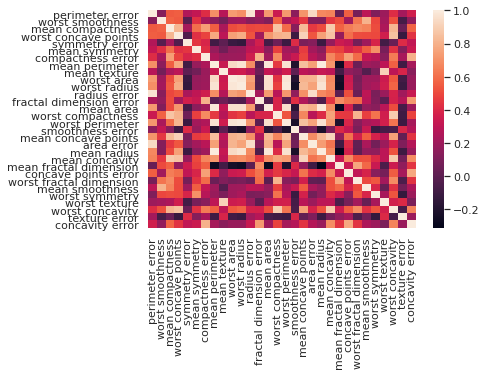

In [12]:
# calculate the correlation matrix
corr = bc_depends.corr()
# plot the heatmap
sns.heatmap(corr, 
xticklabels=corr.columns,
yticklabels=corr.columns)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc_depends, bc_target, test_size=0.5, random_state=42)
display(X_train)
display(y_train)

,perimeter error,worst smoothness,mean compactness,worst concave points,symmetry error,mean symmetry,compactness error,mean perimeter,mean texture,worst area,...,mean concavity,mean fractal dimension,concave points error,worst fractal dimension,mean smoothness,worst symmetry,worst texture,worst concavity,texture error,concavity error
186,1.817,0.1234,0.08468,0.15710,0.01069,0.1621,0.009181,118.60,18.58,1410.0,...,0.08169,0.05425,0.006719,0.06938,0.08588,0.3206,26.36,0.3538,0.4757,0.01412
533,5.168,0.1097,0.13130,0.16130,0.02816,0.2166,0.030890,134.70,20.67,1645.0,...,0.15230,0.05419,0.016990,0.06386,0.09156,0.3220,27.15,0.3092,1.7360,0.04093
383,2.117,0.1427,0.12970,0.09804,0.01838,0.1779,0.037050,80.64,17.48,600.5,...,0.05892,0.06588,0.010510,0.11180,0.10420,0.2819,23.13,0.3206,0.8730,0.04757
269,2.230,0.1335,0.12890,0.08600,0.02728,0.1668,0.047850,69.50,20.39,410.4,...,0.08448,0.06862,0.017450,0.08701,0.10820,0.2605,25.21,0.2534,1.4890,0.07339
86,3.301,0.1306,0.09947,0.12250,0.02418,0.2075,0.029830,94.25,21.46,808.9,...,0.12040,0.05636,0.017610,0.06846,0.09444,0.3020,29.25,0.3349,2.2200,0.05371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2.000,0.1500,0.07849,0.07247,0.01278,0.1688,0.025070,76.53,21.53,583.0,...,0.03328,0.06194,0.007711,0.08541,0.09768,0.2438,26.15,0.1503,0.9227,0.01835
262,6.146,0.1134,0.12730,0.15280,0.02747,0.2108,0.059810,114.40,22.13,1295.0,...,0.09697,0.05464,0.021490,0.07484,0.08999,0.3067,27.24,0.2298,1.6330,0.04638
478,1.567,0.1352,0.08228,0.07431,0.01843,0.1779,0.021140,73.99,14.59,467.6,...,0.05308,0.06574,0.008038,0.09180,0.10460,0.2941,21.90,0.2596,1.1660,0.04156
163,1.955,0.1452,0.10150,0.08194,0.01879,0.1551,0.031750,79.85,22.22,553.0,...,0.05370,0.06761,0.011350,0.09082,0.10120,0.2268,28.68,0.1688,1.6560,0.03125


,class_WDBC-Malignant,class_WDBC-Benign
186,1,0
533,1,0
383,0,1
269,0,1
86,1,0
...,...,...
115,0,1
262,1,0
478,0,1
163,0,1


In [14]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
names = depend_names
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_train_pd = pd.DataFrame(X_train_norm)
X_test_pd = pd.DataFrame(X_test_norm)
X_train_pd.columns = names
X_test_pd.columns = names
display(X_train)

,perimeter error,worst smoothness,mean compactness,worst concave points,symmetry error,mean symmetry,compactness error,mean perimeter,mean texture,worst area,...,mean concavity,mean fractal dimension,concave points error,worst fractal dimension,mean smoothness,worst symmetry,worst texture,worst concavity,texture error,concavity error
186,1.817,0.1234,0.08468,0.15710,0.01069,0.1621,0.009181,118.60,18.58,1410.0,...,0.08169,0.05425,0.006719,0.06938,0.08588,0.3206,26.36,0.3538,0.4757,0.01412
533,5.168,0.1097,0.13130,0.16130,0.02816,0.2166,0.030890,134.70,20.67,1645.0,...,0.15230,0.05419,0.016990,0.06386,0.09156,0.3220,27.15,0.3092,1.7360,0.04093
383,2.117,0.1427,0.12970,0.09804,0.01838,0.1779,0.037050,80.64,17.48,600.5,...,0.05892,0.06588,0.010510,0.11180,0.10420,0.2819,23.13,0.3206,0.8730,0.04757
269,2.230,0.1335,0.12890,0.08600,0.02728,0.1668,0.047850,69.50,20.39,410.4,...,0.08448,0.06862,0.017450,0.08701,0.10820,0.2605,25.21,0.2534,1.4890,0.07339
86,3.301,0.1306,0.09947,0.12250,0.02418,0.2075,0.029830,94.25,21.46,808.9,...,0.12040,0.05636,0.017610,0.06846,0.09444,0.3020,29.25,0.3349,2.2200,0.05371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2.000,0.1500,0.07849,0.07247,0.01278,0.1688,0.025070,76.53,21.53,583.0,...,0.03328,0.06194,0.007711,0.08541,0.09768,0.2438,26.15,0.1503,0.9227,0.01835
262,6.146,0.1134,0.12730,0.15280,0.02747,0.2108,0.059810,114.40,22.13,1295.0,...,0.09697,0.05464,0.021490,0.07484,0.08999,0.3067,27.24,0.2298,1.6330,0.04638
478,1.567,0.1352,0.08228,0.07431,0.01843,0.1779,0.021140,73.99,14.59,467.6,...,0.05308,0.06574,0.008038,0.09180,0.10460,0.2941,21.90,0.2596,1.1660,0.04156
163,1.955,0.1452,0.10150,0.08194,0.01879,0.1551,0.031750,79.85,22.22,553.0,...,0.05370,0.06761,0.011350,0.09082,0.10120,0.2268,28.68,0.1688,1.6560,0.03125


In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_dim=n_input))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(n_outout, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
total_rows = X_train_pd.shape[0]
batch_size=int(total_rows/10)
print('Total rows:'+str(total_rows)+',  Batch size:'+str(batch_size))

Total rows:284,  Batch size:28


In [17]:
model.fit(X_train_pd, y_train, epochs=100, verbose=0, batch_size=batch_size, use_multiprocessing=True)

In [18]:
# evaluate the model
scores = model.evaluate(X_test_pd, y_test, verbose=0, batch_size=batch_size, use_multiprocessing=True)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.88%


In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

class ClassifierNeuralNetwork:
    
    def __init__(self):
        self.__n_input = 0
        self.__hidden = []
        self.__n_output = 0
        self.__X = pd.DataFrame()
        self.__y = pd.DataFrame()
        self.__X2 = pd.DataFrame()
        self.__y2 = pd.DataFrame()
        self.__total_rows = 0
        self.__batch_size = 0
        self.__epochs = 0
        self.__verbose = 0
        self.__scores = 0
        self.__metrics_name = ''
        self.__model = Sequential()
           
    def setInput(self, n_input=4):
        self.__n_input = int(n_input)
        self.__model.add(Flatten(input_dim=int(n_input)))
        
    def setOutput(self, n_output=2, fun='softmax'):
        self.__n_output = int(n_output)
        self.__model.add(Dense(int(n_outout), activation=fun))
        
    def addLayer(self, units=8, fun='relu'):
        self.__model.add(Dense(int(units), activation=fun))
        self.__hidden.append(int(units))
        
    def addLayers(self, layers=[8, 4], fun='relu'):
        for units in layers:
            self.addLayer(int(units), fun)
    
    def getHiddenLayers(self):
        return self.__hidden
            
    def Compile(self):
        self.__model.compile(optimizer=tf.keras.optimizers.Adam()
                             , loss=tf.keras.losses.CategoricalCrossentropy()
                             , metrics=['accuracy'])
    
    def setTrainingDataFrame(self, X, y):
        self.__X = X
        self.__y = y
        self.__total_rows = X.shape[0]
        
        
    def setBatchSize(self, size):
        self.__batch_size=int(self.__total_rows*size)
        
    def Fit(self, epochs, verbose):
        self.__epochs = int(epochs)
        self.__verbose = int(verbose)
        self.__model.fit(self.__X, self.__y
                         , epochs=int(epochs)
                         , verbose=int(verbose)
                         , batch_size=self.__batch_size
                         , use_multiprocessing=True)
        
    def getObjectModel(self):
        return self.__model
    
    def setObjectModel(self):
        return self.__model
        
    def setTestDataFrame(self, X, y):
        self.__X2 = X
        self.__y2 = y
        
    def Evaluate(self):
        scores = self.__model.evaluate(self.__X2, self.__y2
                              , verbose=self.__verbose
                              , batch_size=self.__batch_size
                              , use_multiprocessing=True)
        self.__metrics_name = self.__model.metrics_names[1]
        self.__scores = scores[1]
        
    def getPerformance(self):
        return self.__scores
    
    def getMetricsName(self):
        return self.__metrics_name
        
    def __str__(self):
        s0 = "Total rows in training dataset: " + str(self.__total_rows) + "\n"
        s1 = s0 + "Number of input: " + str(self.__n_input) + "\n"
        s2 = s1 + "Hidden layers: " + str(self.__hidden) + "\n"
        s3 = s2 + "Number of output: " + str(self.__n_output) + "\n"
        s4 = s3 + "Batch size: " + str(self.__batch_size) + "\n"
        s5 = s4 + "Number of epochs: " + str(self.__epochs) + "\n"
        s6 = s5 + "Evaluation metrics: %s, %.2f%%" % (self.__metrics_name, self.__scores*100)
        return s6
    
                
layers = [12, 12, 8]
classifier = ClassifierNeuralNetwork()
classifier.setInput(n_input)
classifier.addLayers(layers, 'relu')
classifier.setOutput(n_outout,'softmax')
classifier.Compile()
classifier.setTrainingDataFrame(X_train_pd, y_train)
classifier.setBatchSize(0.1)
classifier.Fit(100, 0)
classifier.setTestDataFrame(X_test_pd, y_test)
classifier.Evaluate()
print(classifier)
print(classifier.getHiddenLayers())
print(classifier.getPerformance())

Total rows in training dataset: 284
Number of input: 30
Hidden layers: [12, 12, 8]
Number of output: 2
Batch size: 28
Number of epochs: 100
Evaluation metrics: accuracy, 91.93%
[12, 12, 8]
0.9192982316017151


In [20]:
from tqdm import tqdm
import statistics

class ClassifierOptimizer:
  
    def __init__(self):
        self.__HiddenParams = pd.DataFrame()
        self.__HiddenParamsScore = pd.DataFrame()
    
    def HiddenParamsGenerator(self, begin=2, end=32, layers=3):
        v = pd.DataFrame(np.arange(begin, end+1, 2))
        params = v
        for l in range(layers-1):
            params = params.merge(v, how='cross')
        
        col_names = []
        for r in range(layers):
            col_names.append('hl_'+str(r+1))
        
        params.columns = col_names
    
        for l in range(layers-1):
            f = params.iloc[ :, l] >= params.iloc[ :, l+1]
            params = params.loc[f]
    
        params.reset_index(inplace=True, drop=True)
        self.__HiddenParams = params
        
    def getParameters(self):
        return self.__HiddenParams
    
    def setParameters(self, tab):
        self.__HiddenParams = tab
    
    def ModelSearch(self, it):
        result = self.__HiddenParams.copy()
        rows = result.shape[0]
        cols = result.shape[1]
        tot = rows * it
        with tqdm(total=tot) as pbar:
            for index, row in result.iterrows():
                score_list = []
                layers = row.to_numpy().tolist()
                for _ in range(it):
                    classifier = ClassifierNeuralNetwork()
                    classifier.setInput(n_input)
                    classifier.addLayers(layers, 'relu')
                    classifier.setOutput(n_outout,'softmax')
                    classifier.Compile()
                    classifier.setTrainingDataFrame(X_train_pd, y_train)
                    classifier.setBatchSize(0.1)
                    classifier.Fit(100, 0)
                    classifier.setTestDataFrame(X_test_pd, y_test)
                    classifier.Evaluate()
                    hidden = classifier.getHiddenLayers()
                    score = classifier.getPerformance()
                    score_list.append(score * 100)
                    pbar.update(1)
                result.at[index, 'complexity'] = sum(hidden)
                result.at[index, 'accuracy'] = statistics.median(score_list)
        self.__HiddenParamsScore = result.sort_values(['accuracy', 'complexity'], ascending=[False, True])
        
    def getScoreTable(self):
        return self.__HiddenParamsScore
    
    def getBestModel(self):
        best = self.__HiddenParamsScore.iloc[0]
        best.drop(['complexity', 'accuracy'], inplace=True)
        best_ls = best.to_numpy().tolist()
        return best_ls

    
opt = ClassifierOptimizer()
opt.HiddenParamsGenerator(8, 24, 3)

params = opt.getParameters()
params = params.tail(10)
opt.setParameters(params)

opt.ModelSearch(3)

scoring = opt.getScoreTable()

display(params)
display(scoring)   

100%|██████████| 30/30 [00:53<00:00,  1.77s/it]


,hl_1,hl_2,hl_3
155,24,22,22
156,24,24,8
157,24,24,10
158,24,24,12
159,24,24,14
160,24,24,16
161,24,24,18
162,24,24,20
163,24,24,22
164,24,24,24


,hl_1,hl_2,hl_3,complexity,accuracy
155,24,22,22,68.0,92.631578
157,24,24,10,58.0,92.280704
159,24,24,14,62.0,92.280704
160,24,24,16,64.0,92.280704
162,24,24,20,68.0,92.280704
163,24,24,22,70.0,92.280704
158,24,24,12,60.0,91.929823
161,24,24,18,66.0,91.929823
164,24,24,24,72.0,91.929823
156,24,24,8,56.0,91.228068


In [21]:
layers = opt.getBestModel()
classifier = ClassifierNeuralNetwork()
classifier.setInput(n_input)
classifier.addLayers(layers, 'relu')
classifier.setOutput(n_outout,'softmax')
classifier.Compile()
classifier.setTrainingDataFrame(X_train_pd, y_train)
classifier.setBatchSize(0.1)
classifier.Fit(100, 0)
classifier.setTestDataFrame(X_test_pd, y_test)
classifier.Evaluate()
print(classifier)
print(classifier.getHiddenLayers())
print(classifier.getPerformance())

Total rows in training dataset: 284
Number of input: 30
Hidden layers: [24, 22, 22]
Number of output: 2
Batch size: 28
Number of epochs: 100
Evaluation metrics: accuracy, 91.58%
[24, 22, 22]
0.9157894849777222


In [22]:
# Save the entire model as a SavedModel.
model = classifier.getObjectModel()
model.save('my_model')
print("Saved model to disk")
del model  # deletes the existing model

INFO:tensorflow:Assets written to: my_model/assets
Saved model to disk


In [23]:
# load and evaluate a saved model
from keras.models import load_model
# load model
new_model = load_model('my_model')
# summarize model.
new_model.summary()
print("Loaded model from disk")

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 30)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 24)                744       
_________________________________________________________________
dense_129 (Dense)            (None, 22)                550       
_________________________________________________________________
dense_130 (Dense)            (None, 22)                506       
_________________________________________________________________
dense_131 (Dense)            (None, 2)                 46        
Total params: 1,846
Trainable params: 1,846
Non-trainable params: 0
_________________________________________________________________
Loaded model from disk


In [24]:
# evaluate the model
scores = new_model.evaluate(X_test_pd, y_test, batch_size=batch_size, use_multiprocessing=True)
print("%s: %.2f%%" % (new_model.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.9158
accuracy: 91.58%


In [25]:
y_test_cp = y_test.copy()
y_test_np = y_test_cp.to_numpy()
y_test_cp['Original'] = np.argmax(y_test_np, axis=-1)
di = {1: 'WDBC-Malignant',
    0: 'WDBC-Benign'}
y_test_cp['Original'].replace(di, inplace=True)
display(y_test_cp)

,class_WDBC-Malignant,class_WDBC-Benign,Original
376,0,1,WDBC-Malignant
315,0,1,WDBC-Malignant
218,1,0,WDBC-Benign
546,0,1,WDBC-Malignant
203,1,0,WDBC-Benign
...,...,...,...
55,0,1,WDBC-Malignant
550,0,1,WDBC-Malignant
401,0,1,WDBC-Malignant
389,1,0,WDBC-Benign


In [26]:
y_proba = new_model.predict(X_test)
y_test_cp['Prediction'] = np.argmax(y_proba, axis=-1)
y_test_cp['Prediction'].replace(di, inplace=True)
y_test_cp.drop(target_names, axis=1, inplace=True)
display(y_test_cp)

,Original,Prediction
376,WDBC-Malignant,WDBC-Malignant
315,WDBC-Malignant,WDBC-Malignant
218,WDBC-Benign,WDBC-Benign
546,WDBC-Malignant,WDBC-Malignant
203,WDBC-Benign,WDBC-Benign
...,...,...
55,WDBC-Malignant,WDBC-Malignant
550,WDBC-Malignant,WDBC-Malignant
401,WDBC-Malignant,WDBC-Malignant
389,WDBC-Benign,WDBC-Malignant


In [27]:
pd.crosstab(y_test_cp['Original'], y_test_cp['Prediction'])

Prediction,WDBC-Benign,WDBC-Malignant
Original,,
WDBC-Benign,34,67
WDBC-Malignant,0,184
